In [1]:
import pandas as pd
import sklearn.metrics as metrics

from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS

In [2]:
df = pd.read_csv('./data/comment_data_oct_nov.csv')

In [3]:
X = df['body']
y = df['subreddit'].map({'nfl': 0, 'fantasyfootball': 1})
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size = .2, random_state = 123, stratify = y)

In [4]:
def replace_number(X):
    return X.str.replace('\d{2,}', ' ANUMBER ')
replace_number_tf = FunctionTransformer(replace_number, validate = False)

In [5]:
def filler_chars(X):
    return X.str.replace('\n', ' ').replace('\t', ' ')
filler_chars_tf = FunctionTransformer(filler_chars, validate = False)

In [6]:
# pipeline and gridsearch for optimization
pipe = Pipeline([
    ('replace_number_tf', replace_number_tf),
    ('filler_chars_tf', filler_chars_tf),
    ('vect', TfidfVectorizer(binary=True, strip_accents = 'ascii',
                             stop_words = ENGLISH_STOP_WORDS.union(['nfl', 'fantasy','football']))),
    ('ss', StandardScaler(with_mean = False)),
    ('model', KNeighborsClassifier())
])
grid ={
    'vect__min_df': [1,2],
    'vect__max_df': [.3, .4, .5],
    'vect__max_features': [1000, 2000],
    'model__n_neighbors': [3, 5, 7],
    'model__weights':['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan']
}

gs = GridSearchCV(pipe, param_grid = grid)
gs.fit(X_train, y_train)
print(gs.best_score_) # cross val score
gs.best_params_

0.5964093496707455


{'model__metric': 'euclidean',
 'model__n_neighbors': 3,
 'model__weights': 'uniform',
 'vect__max_df': 0.3,
 'vect__max_features': 2000,
 'vect__min_df': 1}

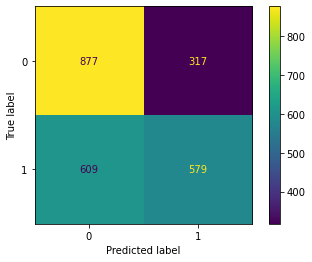

In [7]:
metrics.plot_confusion_matrix(gs, X_test, y_test);

In [8]:
# Calculating test Accuracy
(1551 + 3741)/(1551 + 3741 + 3225 + 1011)

0.5554156171284634

In [9]:
# Calculating test Recall
3741/(3741 + 1011)

0.7872474747474747

**Conclusions:** This model underperforms. Its accuracy barely beats baseline. It has an excellent recall which means very few potential customers will be missed, but the accuracy is so low that the targeted advertising would not save money. Because the model underperforms, no further analysis will be done.